In [3]:
import ZhangPaxtonModel as zpm
aurora_model = zpm.AuroraModel()

In [4]:
import matplotlib.path as mpath
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings
def plot_conductance(kp, savefig=True, cmap_upper=20):
        pedersen,hall =aurora_model.calculate_conductance(kp) # emean is pederesen and eflux is hall
        top_indices, bottom_indices = aurora_model.find_boundary_indices(hall.T, 0.25)
        Lat = np.arange(40, 90.5, 0.15)  # for Southern hemisphere -90:0.5:-30
        Lon = np.arange(0, 360, 0.15)
        xlat, ylon = np.meshgrid(Lat, Lon)
        ###
        fig = plt.figure(figsize=(12, 5))
        ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.NorthPolarStereo())
        fig.subplots_adjust(bottom=0.05, top=0.95,
                            left=0.04, right=0.95, wspace=0.02)

        theta = np.linspace(0, 2 * np.pi, 100)
        center, radius = [0.5, 0.5], 0.5
        verts = np.vstack([np.sin(theta), np.cos(theta)]).T
        circle = mpath.Path(verts * radius + center)
        ax1.set_boundary(circle, transform=ax1.transAxes)

        cs1 = ax1.pcolormesh(
            ylon,
            xlat,
            pedersen,
            transform=ccrs.PlateCarree(),
            cmap='magma',
            vmin=0,
            vmax=cmap_upper,        )

        gl = ax1.gridlines(
            crs=ccrs.PlateCarree(),
            draw_labels=False,
            linewidth=1,
            color="black",
            alpha=0.3,
            linestyle="--",
        )
        ax1.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
        yticks = list(np.arange(40, 90, 15))
        xx = np.arange(-180, 180, 45)
        gl.xlocator = mticker.FixedLocator(xx)
        loc_x_mlt = [0.485, 0.86, 1.01, 0.86, 0.485, 0.1, -0.05, 0.1]
        loc_y_mlt = [-0.04, 0.11, 0.485, 0.86, 1.02, 0.86, 0.485, 0.1]
        loc_x_lat = [0.5] * 6
        loc_y_lat = [0.47, 0.4, 0.3, 0.2, 0.1, 0.0]
        mlt_label = [str(elem) for elem in np.arange(0, 24, 3)]
        lat_label = [str(elem) for elem in np.arange(90, 30, -10)]
        for xmlt, ymlt, label_mlt in zip(loc_x_mlt, loc_y_mlt, mlt_label):
            ax1.text(xmlt, ymlt, label_mlt, transform=ax1.transAxes)
        for x_lat, ylat, label_lat in zip(loc_x_lat, loc_y_lat, lat_label):
            ax1.text(x_lat, ylat, label_lat, transform=ax1.transAxes)
        fig.colorbar(cs1, label=r"$\Sigma_{P}$ (mhos)")
        ax1.text(0.7, 1, "$\Sigma_{P}$, " + "Kp=" +
                 str(kp), transform=ax1.transAxes)
        ax1.plot(Lon, Lat[bottom_indices], "k", transform=ccrs.PlateCarree())
        ax1.plot(Lon, Lat[top_indices], "--r", transform=ccrs.PlateCarree())
        ax2 = fig.add_subplot(122, projection=ccrs.NorthPolarStereo())
        theta = np.linspace(0, 2 * np.pi, 100)
        center, radius = [0.5, 0.5], 0.5
        verts = np.vstack([np.sin(theta), np.cos(theta)]).T
        circle = mpath.Path(verts * radius + center)
        ax2.set_boundary(circle, transform=ax2.transAxes)
        cs2 = ax2.pcolormesh(
            ylon,
            xlat,
            hall,
            transform=ccrs.PlateCarree(),
            cmap='magma',  # cmap=green_aurora_cmap,
            vmin=0,
            vmax=cmap_upper,
        )
        gl = ax2.gridlines(
            crs=ccrs.PlateCarree(),
            draw_labels=False,
            linewidth=1,
            color="black",
            alpha=0.3,
            linestyle="--",
        )
        ax2.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
        xx = np.arange(-180, 180, 45)
        gl.xlocator = mticker.FixedLocator(xx)
        for xmlt, ymlt, label_mlt in zip(loc_x_mlt, loc_y_mlt, mlt_label):
            ax2.text(xmlt, ymlt, label_mlt, transform=ax2.transAxes)
        for x_lat, ylat, label_lat in zip(loc_x_lat, loc_y_lat, lat_label):
            ax2.text(x_lat, ylat, label_lat, transform=ax2.transAxes)
        fig.colorbar(cs2, label=r"$\Sigma_{H}$ (mhos)")
        ax2.text(0.7, 1, "$\Sigma_{H}$," + "Kp=" +
                 str(kp), transform=ax2.transAxes)
        ax2.plot(Lon, Lat[bottom_indices], "k", transform=ccrs.PlateCarree())
        ax2.plot(Lon, Lat[top_indices], "--r", transform=ccrs.PlateCarree())
        if savefig == True:
            plt.savefig("ZhangPaxtonModel_KP" + str(kp) + "_conductance.png", dpi=800)
        plt.show()

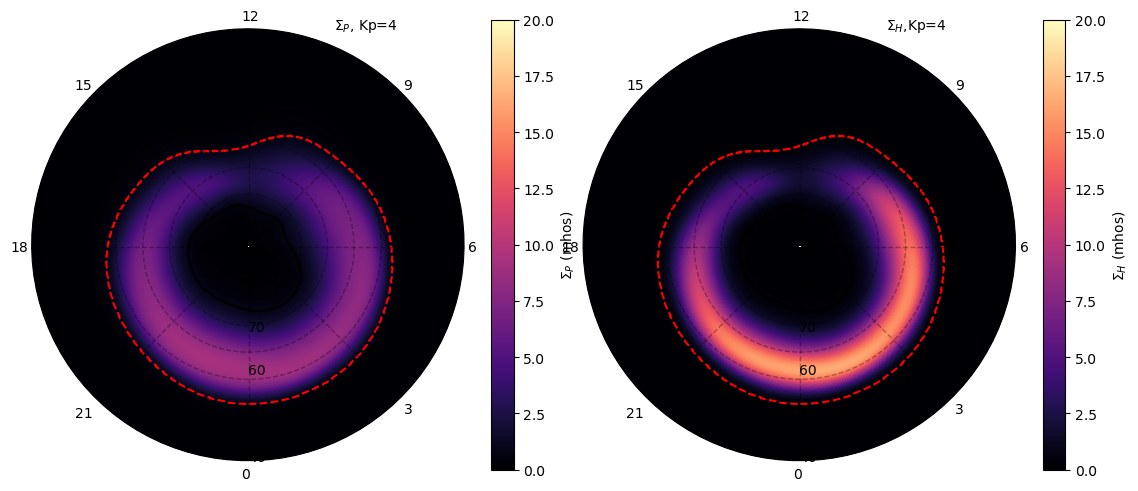

In [5]:
plot_conductance(4)

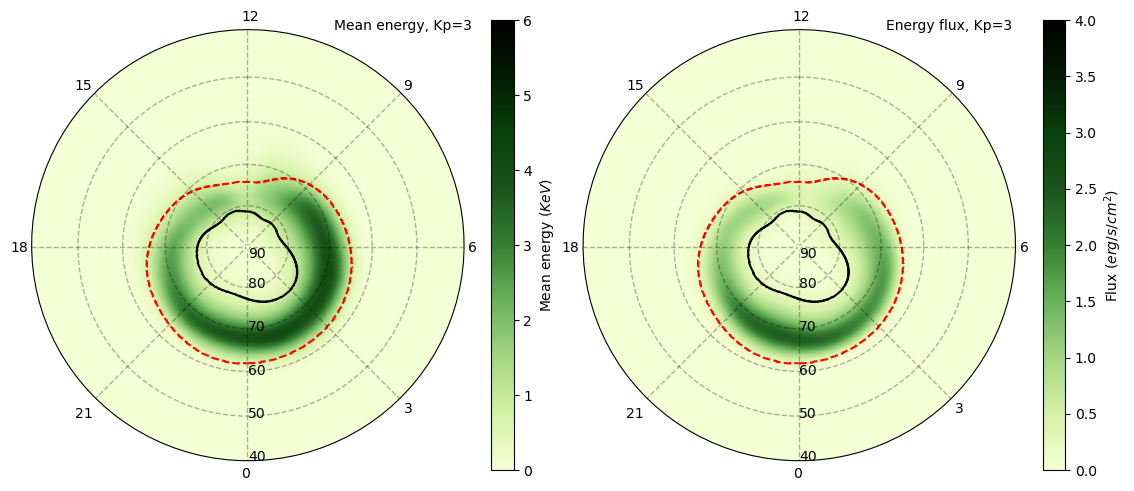

In [6]:
aurora_model.plot_kp(3)